In [1]:
# import libraries
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import inspect
import csv
import src.tuning as t
import pickle

# access parent directory from notebooks directory
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0, parentdir)

%load_ext autoreload
%autoreload 2
%matplotlib inline
%reload_ext autoreload

In [2]:
# Instantiate grid search tuning class
tuning =  t.GridSearch()

/Users/davidblok/Work EUR/GitHub/ABM-PA/src/tuning.py:18: DtypeWarning: Columns (319,321,323,377,434,436,439,441,444,446,449,451,454,456,459,461,464,466,469,471,474,476,479,481,484,486,489,491) have mixed types.Specify dtype option on import or set low_memory=False.
  self.nominationPopulation = p.PeerNominatedDataPopulation('Peer-Nominated data population', self.input_args)
/Users/davidblok/Work EUR/GitHub/ABM-PA/src/tuning.py:104: DtypeWarning: Columns (22) have mixed types.Specify dtype option on import or set low_memory=False.
  super(GridSearch, self).__init__()
/Users/davidblok/Work EUR/GitHub/ABM-PA/src/tuning.py:19: DtypeWarning: Columns (319,321,323,377,434,436,439,441,444,446,449,451,454,456,459,461,464,466,469,471,474,476,479,481,484,486,489,491) have mixed types.Specify dtype option on import or set low_memory=False.
  self.communicationPopulation = p.CommunicationDataPopulation('Communication data population', self.input_args)


# Tuning: nominated network

## 1. Grid search: crude (400 parameter combinations)

In [3]:
# specify parameter space for grid search
i_seq = np.array([0.001, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1])
t_seq = np.array([0.001, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1])


### 1.1. Run grid search simulations

In [4]:
result_error, result_child, result_cl, empirical_data = tuning.execute(t_range=t_seq,
                                                                       i_range=i_seq,
                                                                       t=2000,
                                                                       population_name='nomination')

# Save model output

file = open('../output/tuning/nom_output_error_1.obj', 'wb')
pickle.dump(result_error, file)

file = open('../output/tuning/nom_output_child_1.obj', 'wb')
pickle.dump(result_child, file)

file = open('../output/tuning/nom_output_cl_1.obj', 'wb')
pickle.dump(result_cl, file)

thres_PA: 0.001 I_PA: 0.001 error: 0.9640791007486142 runtime: 26.000025987625122
thres_PA: 0.001 I_PA: 0.05 error: 11.51729956429216 runtime: 24.55557417869568
thres_PA: 0.001 I_PA: 0.1 error: 13.723817530393077 runtime: 23.44185709953308
thres_PA: 0.001 I_PA: 0.15 error: 1.3777213688454785e+63 runtime: 23.31337285041809
thres_PA: 0.001 I_PA: 0.2 error: 7.620054283204067e+69 runtime: 23.433357000350952
thres_PA: 0.001 I_PA: 0.25 error: 1.7318970061483758e+82 runtime: 23.454694747924805
thres_PA: 0.001 I_PA: 0.3 error: 8.423252693097577e+77 runtime: 23.43171000480652
thres_PA: 0.001 I_PA: 0.35 error: 2.8773291060397076e+32 runtime: 23.428537130355835
thres_PA: 0.001 I_PA: 0.4 error: 4.687614396368892e+87 runtime: 23.578387022018433
thres_PA: 0.001 I_PA: 0.45 error: 5.812124753242847e+69 runtime: 23.378913164138794
thres_PA: 0.001 I_PA: 0.5 error: 8.889772000522708e+62 runtime: 23.328702926635742
thres_PA: 0.001 I_PA: 0.55 error: 6.559081595633622e+39 runtime: 23.251255989074707
thres_P

### 1.2 Sum of Squared Errors

Text(0.5, 105.0, 'I PA')

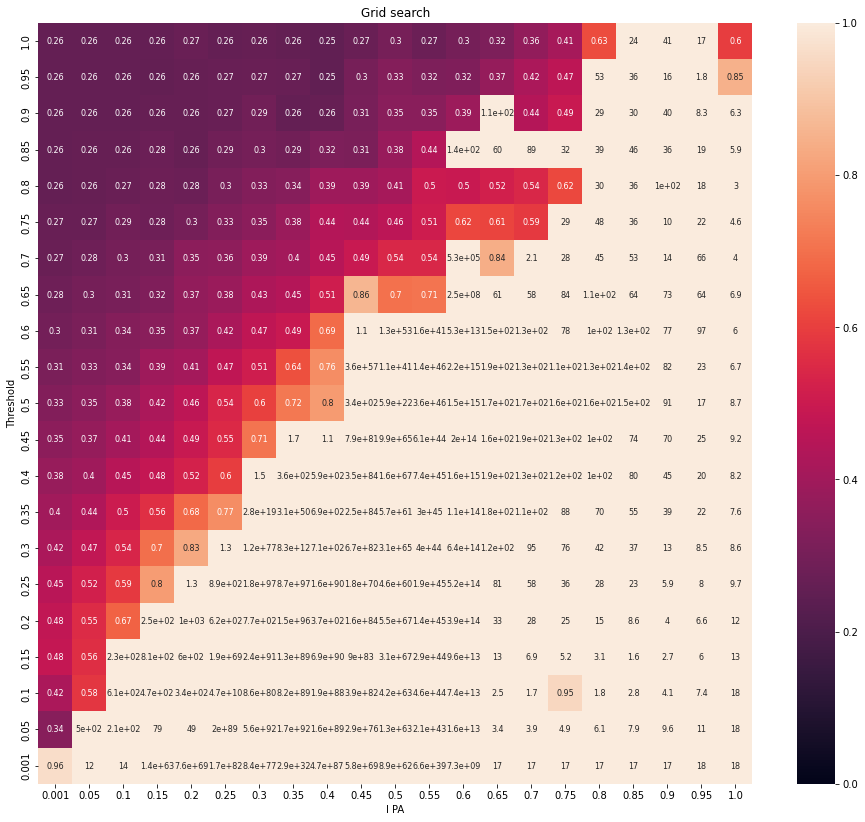

In [5]:
# SSE of all parameter combinations
errors_df = pd.DataFrame(result_error).pivot(index=0, columns=1,values=2)

# plot heatmap of grid search
plt.figure(figsize=((16,14)))
plt.title('Grid search')
sns.heatmap(errors_df, annot=True, annot_kws={"size": 8}, vmin=0, vmax=1).invert_yaxis()
plt.ylabel('Threshold')
plt.xlabel('I PA')

In [6]:
# Save plot
plt.savefig('../output/tuning/grid_search1_error_nomination.eps', bbox_inches='tight', format='eps', dpi=1000)


<Figure size 432x288 with 0 Axes>

### 1.3 Proportion participants changing PAL


In [7]:
# Checking proportion of participants changing PAL

proplist = []

for dat in result_child:
    datlist = []
    for key in dat:
        datlist.append(dat[key])

    res_ind = pd.concat(datlist, axis=1)
    dif = res_ind.iloc[1999] - res_ind.iloc[0]
    proplist.append(dif[dif != 0].count()/dif.count())

prop = pd.DataFrame(proplist)

result_prop = pd.DataFrame(result_error)

result_prop["prop"] = prop

prop_df = pd.DataFrame(result_prop).pivot(index=0, columns=1,values="prop")


Text(0.5, 105.0, 'I PA')

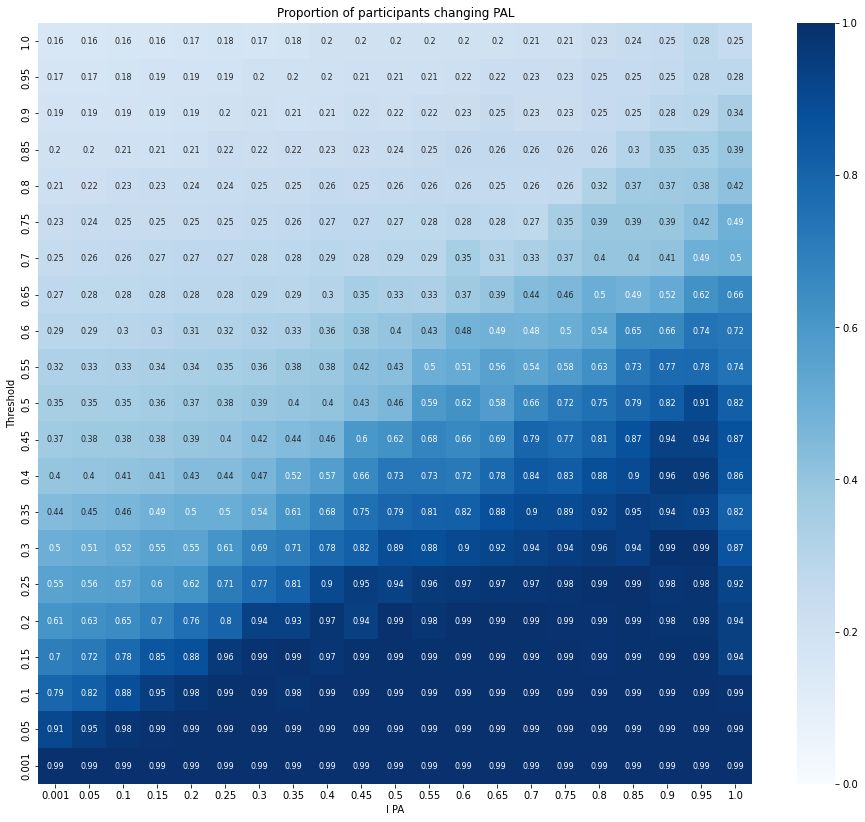

In [8]:
# plot heatmap of proportion changing PAL
plt.figure(figsize=((16,14)))
plt.title('Proportion of participants changing PAL')
sns.heatmap(prop_df, cmap="Blues", annot=True, annot_kws={"size": 8}, vmin=0, vmax=1).invert_yaxis()
plt.ylabel('Threshold')
plt.xlabel('I PA')


In [9]:
# Save plot
plt.savefig('../output/tuning/grid_search1_proportion_nomination.eps', bbox_inches='tight', format='eps', dpi=1000)


<Figure size 432x288 with 0 Axes>

# 2. Grid search: subspace

In [3]:
# specify parameter space for grid search
t_seq = np.arange(0.0025,0.101,0.0025)
i_seq = np.arange(0.0025,0.051,0.0025)

## 2.1 Run grid search simulations

In [4]:
result_error2, result_child2, result_cl2, empirical_data2 = tuning.execute(t_range=t_seq,
                                                                           i_range=i_seq,
                                                                           t=2000,
                                                                           population_name='nomination')

# Save model output to object
file = open('../output/tuning/nom_output_error_2.obj', 'wb')
pickle.dump(result_error2, file)

file = open('../output/tuning/nom_output_child_2.obj', 'wb')
pickle.dump(result_child2, file)

file = open('../output/tuning/nom_output_cl_2.obj', 'wb')
pickle.dump(result_cl2, file)

thres_PA: 0.0025 I_PA: 0.0025 error: 9.271998578903245 runtime: 28.859320640563965
thres_PA: 0.0025 I_PA: 0.005 error: 210.69051543433727 runtime: 25.25230598449707
thres_PA: 0.0025 I_PA: 0.0075 error: 85.8768562976551 runtime: 25.623027086257935
thres_PA: 0.0025 I_PA: 0.01 error: 31.749979454237973 runtime: 25.568912029266357
thres_PA: 0.0025 I_PA: 0.0125 error: 14.825979894925847 runtime: 25.217467069625854
thres_PA: 0.0025 I_PA: 0.015000000000000001 error: 7.301035440551424 runtime: 25.42482304573059
thres_PA: 0.0025 I_PA: 0.017499999999999998 error: 3.3091110928130556 runtime: 25.300924062728882
thres_PA: 0.0025 I_PA: 0.02 error: 1.8183643312209108 runtime: 25.37137794494629
thres_PA: 0.0025 I_PA: 0.0225 error: 1.3951711664242568 runtime: 25.344202041625977
thres_PA: 0.0025 I_PA: 0.024999999999999998 error: 1.4862033194123154 runtime: 25.55522608757019
thres_PA: 0.0025 I_PA: 0.0275 error: 1.847282275239367 runtime: 25.52080512046814
thres_PA: 0.0025 I_PA: 0.03 error: 2.095032193063

### 2.2 Results

In [5]:
# SSE of all parameter combinations
errors_df2 = pd.DataFrame(result_error2).pivot(index=0, columns=1,values=2)
errors_df2

1,0.0025,0.0050,0.0075,0.0100,0.0125,0.0150,0.0175,0.0200,0.0225,0.0250,0.0275,0.0300,0.0325,0.0350,0.0375,0.0400,0.0425,0.0450,0.0475,0.0500
0,,,,,,,,,,,,,,,,,,,,
0.0025,9.271999,210.690515,85.876856,31.749979,14.825980,7.301035,3.309111,1.818364,1.395171,1.486203,1.847282,2.095032e+00,2.969147,3.385821,4.051558,4.420105,5.005923,5.237069,5.680665e+00,6.192490
0.0050,0.313328,0.311722,337.381807,199.629844,130.530627,81.514088,38.131916,27.225504,19.131597,11.806145,6.058157,3.716000e+11,2.493573,2.563591,1.833845,1.586774,1.503897,1.365538,1.607996e+24,1.626928
0.0075,0.240972,0.238357,0.231594,267.292475,324.543086,211.391800,133.300059,85.637908,64.598979,56.604753,29.895874,2.168773e+01,17.585870,12.496206,10.524154,8.253646,5.358816,4.142773,4.083328e+00,2.617467
0.0100,0.208674,0.201528,0.203502,296.181116,278.372919,313.146347,250.993129,172.177224,139.537231,95.274894,74.192569,5.654281e+01,43.554251,35.301887,26.280681,29.474209,16.647852,14.587826,1.805609e+01,10.255953
0.0125,0.195202,0.193931,0.188295,0.198214,71.910592,270.760208,323.586524,238.228788,248.622808,183.441129,136.541389,1.151265e+02,75.301096,73.525167,55.121333,45.141118,37.252357,36.798414,2.773778e+01,21.503236
0.0150,0.196098,0.192803,0.196314,0.208151,0.221686,0.240355,230.881505,345.442064,275.033424,238.887878,196.843198,1.851906e+02,122.883450,113.857056,103.636923,72.645833,72.386042,54.296508,4.818076e+01,42.315605
0.0175,0.206564,0.208852,0.208473,0.211453,0.220917,0.242509,314.284307,307.731996,358.607007,260.510825,270.624019,2.467328e+02,177.728754,191.122118,137.037707,130.240106,115.941480,89.179212,7.286909e+01,69.964580
0.0200,0.216490,0.217406,0.221580,0.229312,0.230575,0.256573,42.416710,390.512875,383.152601,415.143425,299.367278,3.293590e+02,236.291418,239.809453,179.698488,184.735687,135.095256,121.867204,1.061886e+02,100.316000
0.0225,0.228389,0.230940,0.232045,0.240646,0.240100,0.265834,0.282376,133.530901,0.366046,326.438605,261.782867,3.541522e+02,335.239441,256.900351,236.972635,214.545425,185.903020,174.371369,1.599016e+02,121.531307


Text(0.5, 105.0, 'I PA')

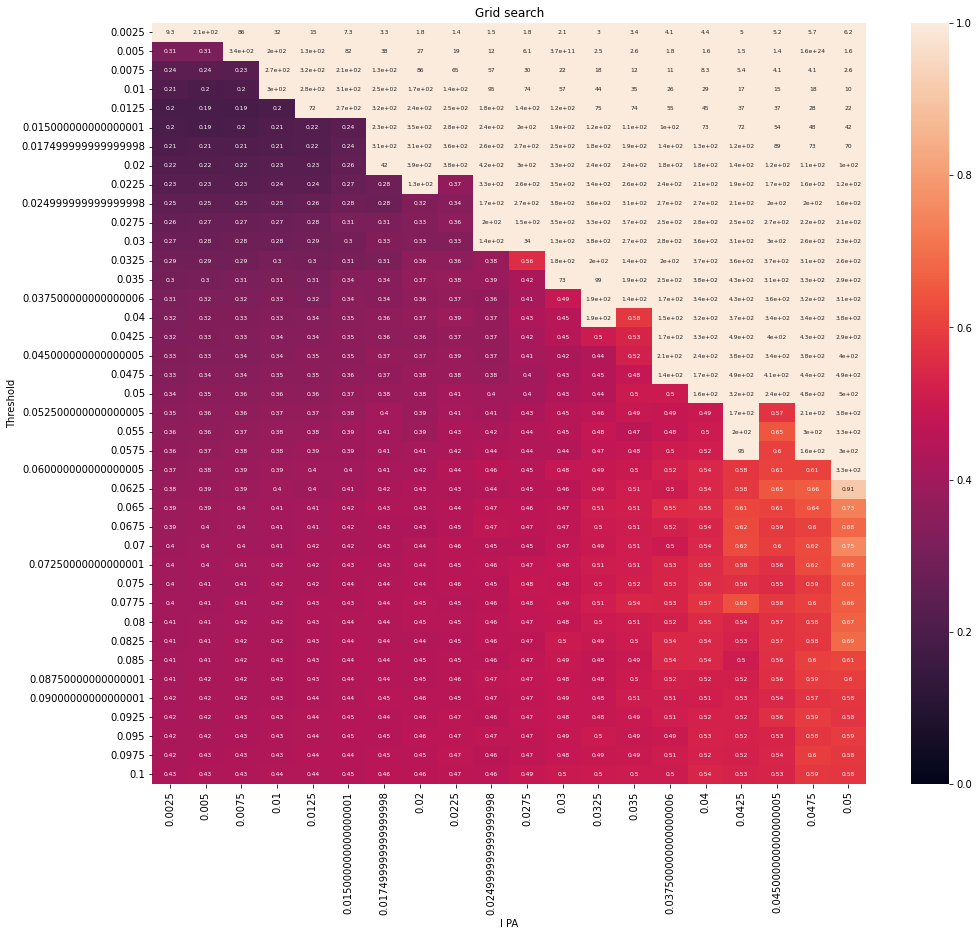

In [6]:
# plot heatmap of grid search
plt.figure(figsize=((16,14)))
plt.title('Grid search')
sns.heatmap(errors_df2, annot=True, annot_kws={"size": 6}, vmin=0, vmax=1).invert_yaxis()
plt.ylabel('Threshold')
plt.xlabel('I PA')

In [7]:
plt.savefig('../output/tuning/grid_search2_nomination.eps', bbox_inches='tight', format='eps', dpi=1000)


<Figure size 432x288 with 0 Axes>

### 2.3 Select best fitting parameter combinations

In [8]:
sort_errors = result_error2

opt_pars = tuple(sort_errors)
opt_pars = sorted(opt_pars, key=lambda x:x[2])
# select top 100 parameter combinations
opt_pars  = opt_pars[0:100]
opt_pars

[(0.0125, 0.0075, 0.18829505420805687),
 (0.015000000000000001, 0.005, 0.19280340550803954),
 (0.0125, 0.005, 0.19393133134943089),
 (0.0125, 0.0025, 0.19520161733298744),
 (0.015000000000000001, 0.0025, 0.19609760230670203),
 (0.015000000000000001, 0.0075, 0.1963138958103013),
 (0.0125, 0.01, 0.1982135355346857),
 (0.01, 0.005, 0.20152786905623918),
 (0.01, 0.0075, 0.20350187873197434),
 (0.017499999999999998, 0.0025, 0.20656378163780684),
 (0.015000000000000001, 0.01, 0.20815097019611759),
 (0.017499999999999998, 0.0075, 0.2084726067461249),
 (0.01, 0.0025, 0.2086744363912138),
 (0.017499999999999998, 0.005, 0.20885182512581607),
 (0.017499999999999998, 0.01, 0.21145338917691223),
 (0.02, 0.0025, 0.21648985046457953),
 (0.02, 0.005, 0.2174059528981496),
 (0.017499999999999998, 0.0125, 0.22091720351502012),
 (0.02, 0.0075, 0.22158039297910995),
 (0.015000000000000001, 0.0125, 0.22168637277481706),
 (0.0225, 0.0025, 0.2283894648299907),
 (0.02, 0.01, 0.22931170756870778),
 (0.02, 0.012

In [9]:
with open('../output/opt_pars_nomination.csv','w') as out:
    csv_out=csv.writer(out)
    csv_out.writerow(['threshold','ipa', 'error'])
    for row in opt_pars:
        csv_out.writerow(row)



In [10]:
# Run with optimal params

result_error3, result_child3, result_cl3, empirical_data3 = tuning.executeSet(param_set=opt_pars,
                                                                              t=2000,
                                                                              population_name='nomination')

# Save model output to object
file = open('../output/tuning/nom_output_error_3.obj', 'wb')
pickle.dump(result_error3, file)

file = open('../output/tuning/nom_output_child_3.obj', 'wb')
pickle.dump(result_child3, file)

file = open('../output/tuning/nom_output_cl_3.obj', 'wb')
pickle.dump(result_cl3, file)

thres_PA: 0.0125 I_PA: 0.0075 error: 0.18829505420805687 runtime: 22.63216209411621
thres_PA: 0.015000000000000001 I_PA: 0.005 error: 0.19280340550803954 runtime: 22.66590690612793
thres_PA: 0.0125 I_PA: 0.005 error: 0.19393133134943089 runtime: 22.284814834594727
thres_PA: 0.0125 I_PA: 0.0025 error: 0.19520161733298744 runtime: 22.56353998184204
thres_PA: 0.015000000000000001 I_PA: 0.0025 error: 0.19609760230670203 runtime: 23.423385858535767
thres_PA: 0.015000000000000001 I_PA: 0.0075 error: 0.1963138958103013 runtime: 22.715686082839966
thres_PA: 0.0125 I_PA: 0.01 error: 0.1982135355346857 runtime: 23.096301078796387
thres_PA: 0.01 I_PA: 0.005 error: 0.20152786905623918 runtime: 22.688587188720703
thres_PA: 0.01 I_PA: 0.0075 error: 0.20350187873197434 runtime: 22.666543006896973
thres_PA: 0.017499999999999998 I_PA: 0.0025 error: 0.20656378163780684 runtime: 22.576977968215942
thres_PA: 0.015000000000000001 I_PA: 0.01 error: 0.20815097019611759 runtime: 22.535715103149414
thres_PA: 0

# Visualization of runs for checking

In [ ]:
# Read parameter combinations selected.
file = open('../output/tuning/nom_output_error_2.obj', 'rb')
com_error2 = pickle.load(file)

opt_pars = tuple(com_error2)
opt_pars = sorted(opt_pars, key=lambda x:x[2])
# select top 100 parameter combinations
opt_pars  = opt_pars[0:100]
opt_pars


thres_PA: 0.01 I_PA: 0.001 error: 0.29434851796035333 runtime: 23.7306649684906
thres_PA: 0.02 I_PA: 0.001 error: 0.2360026822991913 runtime: 21.926981925964355
thres_PA: 0.03 I_PA: 0.001 error: 0.24244412763206646 runtime: 22.503624200820923
thres_PA: 0.04 I_PA: 0.001 error: 0.25054143335034906 runtime: 21.87919306755066
thres_PA: 0.05 I_PA: 0.001 error: 0.25977111019915994 runtime: 22.983970165252686


<AxesSubplot:>

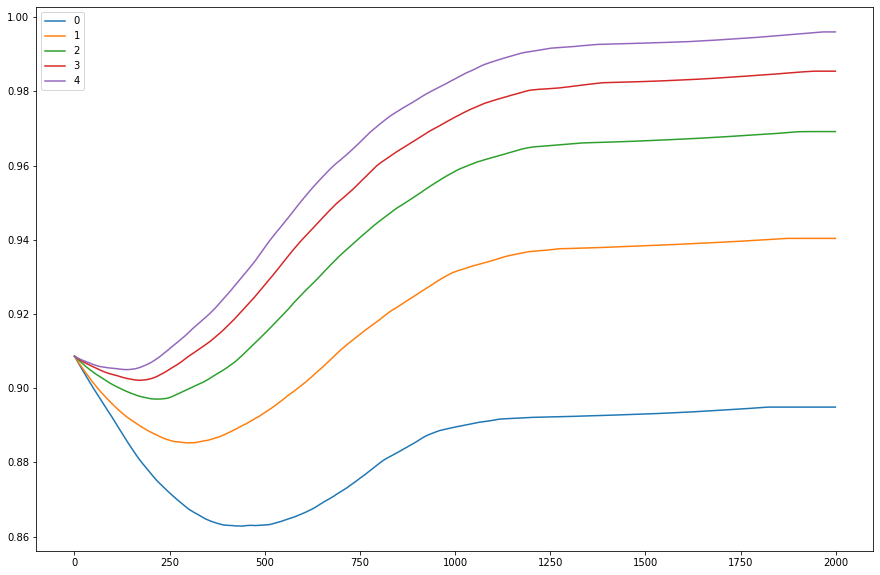

In [39]:
opt_pars = []
opt_pars.append((0.01, 0.001))
opt_pars.append((0.02, 0.001))
opt_pars.append((0.03, 0.001))
opt_pars.append((0.04, 0.001))
opt_pars.append((0.05, 0.001))

result_error3, result_child3, result_cl3, empirical_data3 = tuning.executeSet(param_set=opt_pars,
                                                                              t=2000,
                                                                              population_name='nomination')
by_run_nom = []
for run in range(len(opt_pars)):
    by_run_nom.append(pd.DataFrame(result_cl3[run]).mean(axis=1))

avg_nom = pd.concat(by_run_nom, axis=1)

avg_nom.plot(figsize=((15, 10)))

thres_PA: 0.001 I_PA: 0.001 error: 0.727023013775987 runtime: 21.873879194259644
thres_PA: 0.002 I_PA: 0.001 error: 0.6262752682355959 runtime: 22.540412187576294
thres_PA: 0.003 I_PA: 0.001 error: 0.5251091353991714 runtime: 22.518293380737305
thres_PA: 0.004 I_PA: 0.001 error: 0.46018077713794614 runtime: 21.765886068344116
thres_PA: 0.005 I_PA: 0.001 error: 0.4130739480366455 runtime: 21.765640020370483
thres_PA: 0.006 I_PA: 0.001 error: 0.37531884808657856 runtime: 21.79991912841797
thres_PA: 0.007 I_PA: 0.001 error: 0.34838136623249627 runtime: 22.226574897766113
thres_PA: 0.008 I_PA: 0.001 error: 0.3271020491230968 runtime: 23.23566222190857
thres_PA: 0.009 I_PA: 0.001 error: 0.30923633263798833 runtime: 22.229538917541504
thres_PA: 0.01 I_PA: 0.001 error: 0.29434851796035333 runtime: 22.36456608772278


<AxesSubplot:>

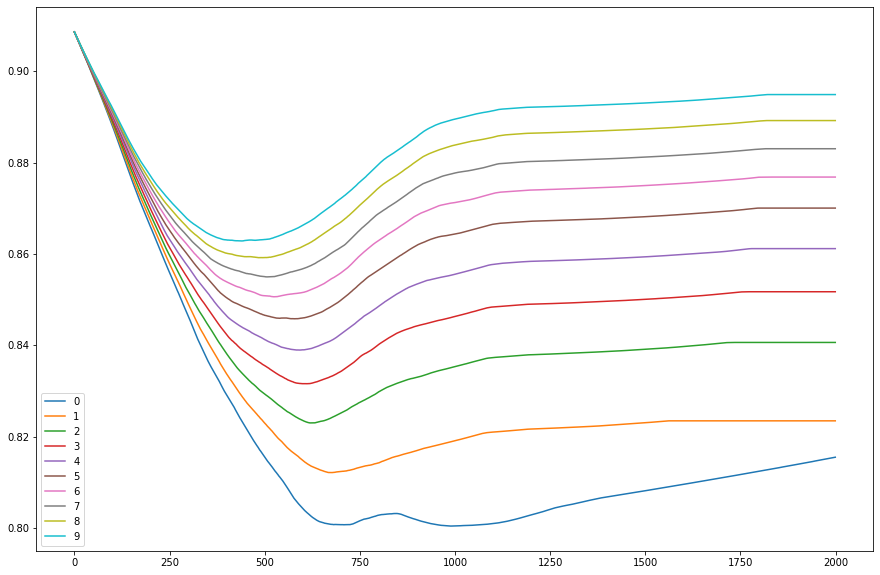

In [40]:
opt_pars = []
opt_pars.append((0.001, 0.001))
opt_pars.append((0.002, 0.001))
opt_pars.append((0.003, 0.001))
opt_pars.append((0.004, 0.001))
opt_pars.append((0.005, 0.001))
opt_pars.append((0.006, 0.001))
opt_pars.append((0.007, 0.001))
opt_pars.append((0.008, 0.001))
opt_pars.append((0.009, 0.001))
opt_pars.append((0.010, 0.001))


result_error3, result_child3, result_cl3, empirical_data3 = tuning.executeSet(param_set=opt_pars,
                                                                              t=2000,
                                                                              population_name='nomination')
by_run_nom = []
for run in range(len(opt_pars)):
    by_run_nom.append(pd.DataFrame(result_cl3[run]).mean(axis=1))

avg_nom = pd.concat(by_run_nom, axis=1)

avg_nom.plot(figsize=((15, 10)))

thres_PA: 0.0025 I_PA: 0.005 error: 17.832797167284745 runtime: 22.249979734420776
thres_PA: 0.005 I_PA: 0.005 error: 0.3117216611847961 runtime: 22.0069317817688
thres_PA: 0.01 I_PA: 0.005 error: 0.20152786905623918 runtime: 22.36697220802307


<AxesSubplot:>

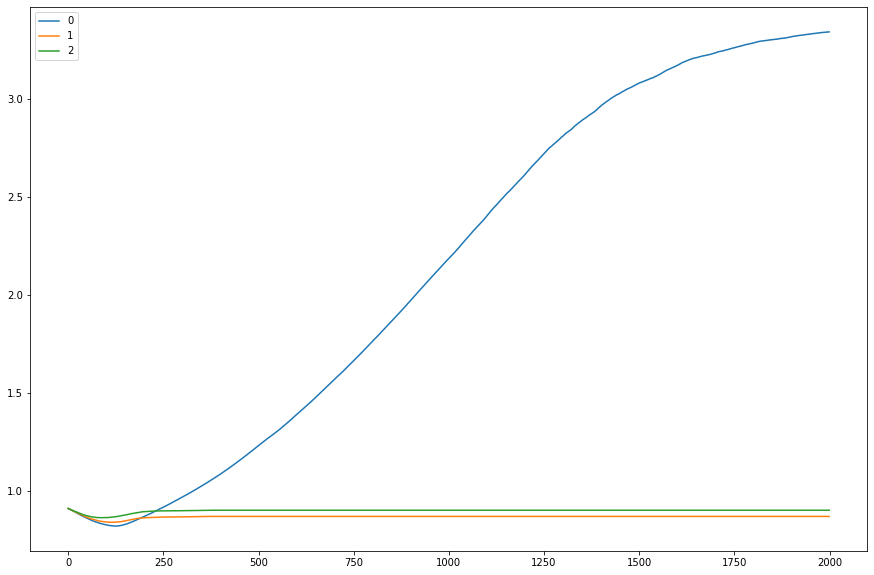

In [48]:
opt_pars = []
opt_pars.append((0.0025, 0.005))
opt_pars.append((0.005, 0.005))
opt_pars.append((0.010, 0.005))


result_error3, result_child3, result_cl3, empirical_data3 = tuning.executeSet(param_set=opt_pars,
                                                                              t=2000,
                                                                              population_name='nomination')
by_run_nom = []
for run in range(len(opt_pars)):
    by_run_nom.append(pd.DataFrame(result_cl3[run]).mean(axis=1))

avg_nom = pd.concat(by_run_nom, axis=1)

avg_nom.plot(figsize=((15, 10)))

thres_PA: 0.01 I_PA: 0.001 error: 0.29434851796035333 runtime: 22.18756413459778
thres_PA: 0.01 I_PA: 0.0025 error: 0.21363322197143225 runtime: 21.585574865341187
thres_PA: 0.01 I_PA: 0.003 error: 0.20637463714451013 runtime: 21.900809049606323
thres_PA: 0.01 I_PA: 0.005 error: 0.20152786905623918 runtime: 21.702270984649658


<AxesSubplot:>

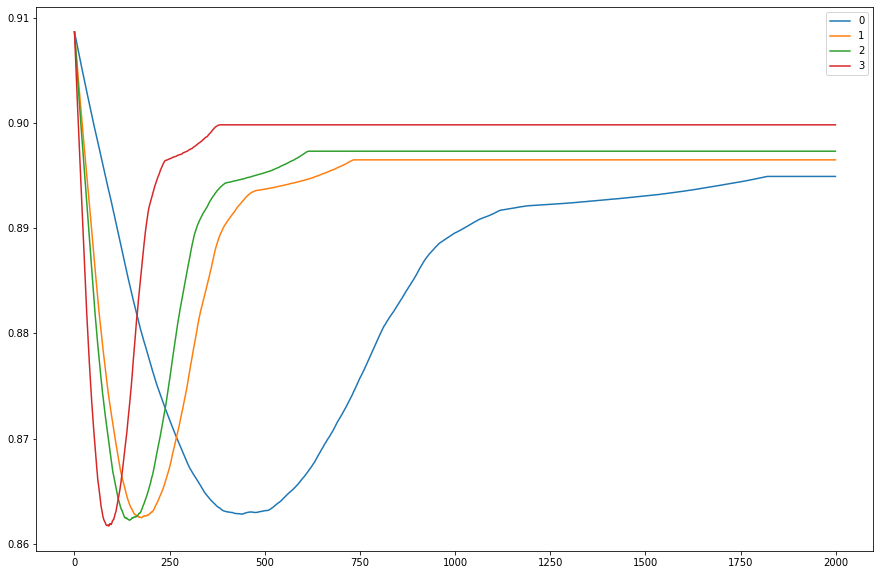

In [52]:
opt_pars = []
opt_pars.append((0.01, 0.001))
opt_pars.append((0.01, 0.0025))
opt_pars.append((0.01, 0.003))
opt_pars.append((0.01, 0.005))
result_error3, result_child3, result_cl3, empirical_data3 = tuning.executeSet(param_set=opt_pars,
                                                                              t=2000,
                                                                              population_name='nomination')
by_run_nom = []
for run in range(len(opt_pars)):
    by_run_nom.append(pd.DataFrame(result_cl3[run]).mean(axis=1))

avg_nom = pd.concat(by_run_nom, axis=1)

avg_nom.plot(figsize=((15, 10)))

In [53]:
avg_nom

,0,1,2,3
0,0.908637,0.908637,0.908637,0.908637
1,0.908455,0.908183,0.908092,0.907729
2,0.908277,0.907740,0.907562,0.906826
3,0.908099,0.907289,0.907023,0.905927
4,0.907920,0.906838,0.906481,0.905047
...,...,...,...,...
1995,0.894913,0.896487,0.897308,0.899813
1996,0.894913,0.896487,0.897308,0.899813
1997,0.894913,0.896487,0.897308,0.899813
1998,0.894913,0.896487,0.897308,0.899813
